In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
import keras.initializers
from keras.layers.normalization import BatchNormalization
from keras import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Final project

## Convolutional neural network to predict EKG anomalies

Electrocardiogram signals differ significantly when they show an underlying heart disease. The main objective of this project is to create a Convolutional neural network to predict EKG anomalies. Instead of using 2D convolutions, the kernels used to build models with signal data use 1D convolutions. Model will be created in Keras.

The 5 classes to be classified are:

- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

- N : Normal beat
- S : Supraventricular premature beat
- V : Premature Ventricular contraction
- F : Fusion of ventricular and normal beat
- Q : Unclassifiable beat

In [28]:
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

In [29]:
train_df.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
test_df.head()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Classes: 

train_df.iloc[:,187].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

It can be seen that the classes for the different ECG heart beats is very imbalanced, with class 3 having inly 641 and Normal beats being 72470. A resampling and downsampling approach will be used to correct for this imbalance.

In [31]:
class_0 = train_df[train_df.iloc[:,187] == 0]
class_1 = train_df[train_df.iloc[:,187] == 1]
class_2 = train_df[train_df.iloc[:,187] == 2]
class_3 = train_df[train_df.iloc[:,187] == 3]
class_4 = train_df[train_df.iloc[:,187] == 4]

In [33]:
class_0_downsample = class_0.sample(n=15000, random_state = 42)
class_1_upsample = class_1.sample(n=15000, random_state = 42, replace = True)
class_2_upsample = class_2.sample(n=15000, random_state = 42, replace = True)
class_3_upsample = class_3.sample(n=15000, random_state = 42, replace = True)
class_4_upsample = class_4.sample(n=15000, random_state = 42, replace = True)


In [34]:
train_df=pd.concat([class_0_downsample,class_1_upsample,class_2_upsample,class_3_upsample,class_4_upsample])

In [36]:
train_df.iloc[:,187].value_counts()

1.0    15000
3.0    15000
4.0    15000
2.0    15000
0.0    15000
Name: 0.000000000000000000e+00.88, dtype: int64

## Data visualization of different types of heartbeats

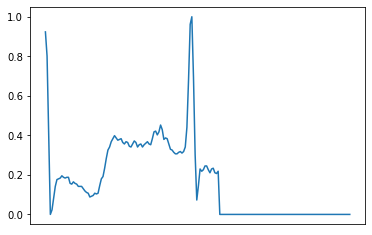

In [48]:
plt.plot(train_df.iloc[0,:186])
plt.xticks([], [])
plt.show()


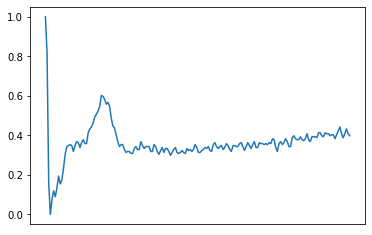

In [49]:
plt.plot(train_df.iloc[15001,:186])
plt.xticks([], [])
plt.show()

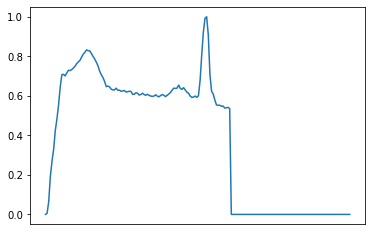

In [50]:
plt.plot(train_df.iloc[30001,:186])
plt.xticks([], [])
plt.show()

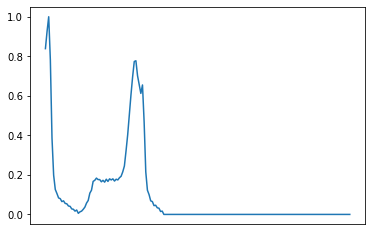

In [51]:
plt.plot(train_df.iloc[45001,:186])
plt.xticks([], [])
plt.show()

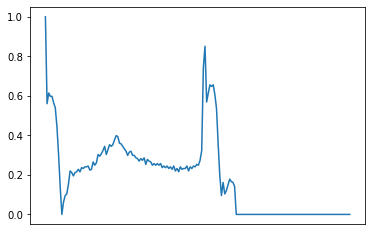

In [52]:
plt.plot(train_df.iloc[60001,:186])
plt.xticks([], [])
plt.show()

### Train test validation split

In [54]:
from sklearn.model_selection import train_test_split

In [107]:
# Validation set creation for evaluation of hyperparameters
x_train, x_test, y_train, y_test = train_test_split(train_df.iloc[:, :186], train_df.iloc[:,187], test_size = 0.1, random_state = 42)

In [108]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.025,186)
    return (signal+noise)

Gaussian noise is added to the signal to augment data and make the final model better at generalizing at unseen inputs.

In [109]:
for row in range(0, len(x_train)):
    signal = np.array(x_train.iloc[row,:])
    x_train.iloc[row, :] = add_gaussian_noise(signal)

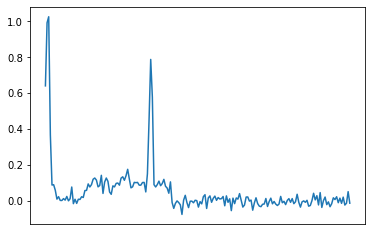

In [110]:
plt.plot(x_train.iloc[0,:186])
plt.xticks([], [])
plt.show()

Visualization of the signal with the added noise.

In [123]:
x_train

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.77,0.000000000000000000e+00.78,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86
80958,0.640362,0.992021,1.025826,0.367242,0.087397,0.089057,0.058321,0.008826,0.022454,0.001565,...,0.006356,0.021983,-0.011212,0.014179,-0.014744,0.019840,-0.024282,-0.013976,0.050402,-0.013914
80548,0.980594,0.842986,0.524502,0.255154,0.120241,0.178245,0.138592,0.115439,0.085533,0.072315,...,-0.025174,0.050808,0.035318,0.005446,0.010913,0.010883,-0.014863,0.008176,0.081281,0.017527
83804,0.753611,0.626220,0.533716,0.431734,0.278630,0.137910,0.025894,0.066815,0.031852,0.076591,...,0.016879,-0.049641,0.028025,-0.007058,0.021559,0.008358,-0.016582,0.026763,0.019314,0.042620
80610,1.022965,0.846689,0.417225,0.100174,-0.031708,0.103672,0.088950,0.073535,0.065826,0.029647,...,-0.023515,0.022263,-0.030630,0.004837,0.035332,-0.017145,-0.020126,0.024094,0.029696,0.025581
73544,0.962577,0.975299,0.368859,0.016085,0.255807,0.261146,0.264237,0.219974,0.291598,0.320075,...,0.102428,-0.036930,-0.051363,0.004568,-0.028535,-0.013406,0.036865,-0.020972,0.016510,0.008693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80338,0.554093,0.519308,0.278781,-0.033431,0.028184,0.077697,0.063217,0.136768,0.072865,0.042411,...,0.350874,0.247204,0.269027,0.270009,0.315503,0.317233,0.282435,0.302726,0.253477,0.289944
38189,1.014582,0.914427,0.473932,0.183519,0.138295,0.133184,0.136175,0.101307,0.100756,0.035411,...,0.002726,-0.013724,-0.006630,-0.008958,-0.023340,0.005009,-0.053728,-0.023784,0.012343,-0.005118
80964,0.911943,0.999652,0.593834,0.287097,0.268644,0.317319,0.227244,0.257149,0.286659,0.322571,...,0.022253,-0.008754,-0.002558,-0.016441,-0.005915,-0.023681,-0.015874,-0.027180,0.025914,-0.009374
63270,0.982813,1.016527,0.431314,0.027842,0.212198,0.320323,0.325658,0.353630,0.270173,0.332163,...,-0.022491,0.012514,-0.018372,0.001370,0.074163,0.027617,0.003724,-0.030932,-0.026770,0.040955


In [148]:
x_train = np.expand_dims(np.array(x_train),axis = 2)
x_test = np.expand_dims(np.array(x_test), axis = 2)

In [153]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [156]:
model_1 = Sequential()
model_1.add(Conv1D(32, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform", input_shape = (186,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPool1D(pool_size = 2))


model_1.add(Conv1D(64, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_1.add(BatchNormalization())
model_1.add(MaxPool1D(pool_size = 2))


model_1.add(Conv1D(128, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_1.add(BatchNormalization())
model_1.add(MaxPool1D(pool_size = 2))

model_1.add(Conv1D(128, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_1.add(BatchNormalization())
model_1.add(MaxPool1D(pool_size = 2))


model_1.add(Flatten())
model_1.add(Dense(64, activation ="relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(5, activation='softmax'))

In [157]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 186, 32)           128       
_________________________________________________________________
batch_normalization_9 (Batch (None, 186, 32)           128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 93, 32)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 93, 64)            6208      
_________________________________________________________________
batch_normalization_10 (Batc (None, 93, 64)            256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 46, 64)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 46, 128)         

The main idea behind the created model is to use 1D convolutions to extract the most important features that will allow the feed-forward network to classify the different types of heartbeats correctly.

Willl use Adam optimizer to train the CNN.

In [158]:
Adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [159]:
model_1.compile(optimizer= Adam, loss='categorical_crossentropy',metrics = [tf.keras.metrics.Precision(), 'accuracy'])

In [160]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=False)]

In [161]:
model_1.fit(x_train, y_train, epochs = 40, callbacks = callbacks, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)

Train on 67500 samples, validate on 7500 samples
Epoch 1/40
67500/67500 [==============================] - 13s 194us/step - loss: 0.4007 - precision_4: 0.8513 - accuracy: 0.8541 - val_loss: 0.1852 - val_precision_4: 0.8942 - val_accuracy: 0.9279
Epoch 2/40
  896/67500 [..............................] - ETA: 12s - loss: 0.2363 - precision_4: 0.8967 - accuracy: 0.9118

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


67500/67500 [==============================] - 13s 185us/step - loss: 0.2272 - precision_4: 0.9064 - accuracy: 0.9166 - val_loss: 0.1145 - val_precision_4: 0.9155 - val_accuracy: 0.9597
Epoch 3/40
67500/67500 [==============================] - 13s 185us/step - loss: 0.1712 - precision_4: 0.9221 - accuracy: 0.9384 - val_loss: 0.1489 - val_precision_4: 0.9270 - val_accuracy: 0.9420
Epoch 4/40
67500/67500 [==============================] - 13s 186us/step - loss: 0.1413 - precision_4: 0.9309 - accuracy: 0.9491 - val_loss: 0.1152 - val_precision_4: 0.9342 - val_accuracy: 0.9541
Epoch 5/40
67500/67500 [==============================] - 12s 185us/step - loss: 0.1179 - precision_4: 0.9374 - accuracy: 0.9579 - val_loss: 0.0808 - val_precision_4: 0.9402 - val_accuracy: 0.9717
Epoch 6/40
67500/67500 [==============================] - 12s 184us/step - loss: 0.1015 - precision_4: 0.9426 - accuracy: 0.9642 - val_loss: 0.0703 - val_precision_4: 0.9450 - val_accuracy: 0.9777
Epoch 7/40
67500/67500 [==

As we can see the model created has good performance with up to 98.55% accuracy and 97.16% of precision in validation.

In [168]:
final_test = np.expand_dims(np.array(test_df.iloc[:,:186]), axis = 2)

In [173]:
predictions = np.argmax(model_1.predict(final_test), axis = 1)

In [179]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [178]:
print(classification_report(predictions, test_df.iloc[:,187]))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17555
           1       0.86      0.49      0.63       977
           2       0.94      0.93      0.93      1466
           3       0.89      0.57      0.69       253
           4       0.99      0.97      0.98      1640

    accuracy                           0.96     21891
   macro avg       0.93      0.79      0.84     21891
weighted avg       0.96      0.96      0.96     21891



As we can see the model has bad recall for categories 1 and 3, with 0.49 and 0.57 of recall for those specific categories.

In [181]:
print(confusion_matrix(predictions, test_df.iloc[:,187]))

[[17440    66    31     8    10]
 [  472   480    21     3     1]
 [   91     7  1358     7     3]
 [   74     3    31   144     1]
 [   40     0     7     0  1593]]


For this second model the idea is to increase the number of trainable parameters to increase the capacity and thus, try to achieve an even better accuracy

In [185]:
model_2 = Sequential()
model_2.add(Conv1D(32, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform", input_shape = (186,1)))
model_2.add(BatchNormalization())
model_2.add(MaxPool1D(pool_size = 2))

model_2.add(Conv1D(64, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_2.add(BatchNormalization())
model_2.add(MaxPool1D(pool_size = 2))

model_2.add(Conv1D(128, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_2.add(BatchNormalization())
model_2.add(MaxPool1D(pool_size = 2))

model_2.add(Conv1D(128, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_2.add(BatchNormalization())
model_2.add(MaxPool1D(pool_size = 2))

model_2.add(Conv1D(256, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_2.add(BatchNormalization())
model_2.add(MaxPool1D(pool_size = 2))


model_2.add(Flatten())
model_2.add(Dense(128, activation ="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(64, activation ="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(5, activation='softmax'))

In [188]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 186, 32)           128       
_________________________________________________________________
batch_normalization_13 (Batc (None, 186, 32)           128       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 93, 32)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 93, 64)            6208      
_________________________________________________________________
batch_normalization_14 (Batc (None, 93, 64)            256       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 46, 64)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 46, 128)         

In [189]:
Adam = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [190]:
model_2.compile(optimizer= Adam, loss='categorical_crossentropy',metrics = [tf.keras.metrics.Precision(), 'accuracy'])

In [191]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model_2.h5', monitor='val_loss', save_best_only=False)]

In [192]:
model_2.fit(x_train, y_train, epochs = 40, callbacks = callbacks, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)

Train on 67500 samples, validate on 7500 samples
Epoch 1/40
67500/67500 [==============================] - 15s 228us/step - loss: 0.7222 - precision_6: 0.7736 - accuracy: 0.7540 - val_loss: 0.3889 - val_precision_6: 0.8461 - val_accuracy: 0.8787
Epoch 2/40
  800/67500 [..............................] - ETA: 14s - loss: 0.4669 - precision_6: 0.8504 - accuracy: 0.8425

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


67500/67500 [==============================] - 15s 215us/step - loss: 0.5339 - precision_6: 0.8568 - accuracy: 0.8298 - val_loss: 0.4983 - val_precision_6: 0.8623 - val_accuracy: 0.8667
Epoch 3/40
67500/67500 [==============================] - 14s 215us/step - loss: 0.5300 - precision_6: 0.8664 - accuracy: 0.8387 - val_loss: 0.4877 - val_precision_6: 0.8692 - val_accuracy: 0.8131
Epoch 4/40
67500/67500 [==============================] - 14s 215us/step - loss: 0.5690 - precision_6: 0.8704 - accuracy: 0.8261 - val_loss: 0.3767 - val_precision_6: 0.8717 - val_accuracy: 0.8665
Epoch 5/40
67500/67500 [==============================] - 15s 215us/step - loss: 0.5830 - precision_6: 0.8727 - accuracy: 0.8241 - val_loss: 0.4867 - val_precision_6: 0.8732 - val_accuracy: 0.8605
Epoch 6/40
67500/67500 [==============================] - 14s 214us/step - loss: 0.6031 - precision_6: 0.8734 - accuracy: 0.8171 - val_loss: 0.4030 - val_precision_6: 0.8737 - val_accuracy: 0.8689
Epoch 7/40
67500/67500 [==

LR is too high in this experiment, model starts to diverge, shown by the increase of train and validation losses.

In [197]:
Adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [198]:
model_2.compile(optimizer= Adam, loss='categorical_crossentropy',metrics = [tf.keras.metrics.Precision(), 'accuracy'])

In [199]:
model_2.fit(x_train, y_train, epochs = 40, callbacks = callbacks, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)

Train on 67500 samples, validate on 7500 samples
Epoch 1/40
67500/67500 [==============================] - 15s 228us/step - loss: 0.5090 - precision_9: 0.8397 - accuracy: 0.8397 - val_loss: 0.3323 - val_precision_9: 0.8543 - val_accuracy: 0.8787
Epoch 2/40
  800/67500 [..............................] - ETA: 13s - loss: 0.4369 - precision_9: 0.8567 - accuracy: 0.8650

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


67500/67500 [==============================] - 15s 219us/step - loss: 0.4470 - precision_9: 0.8611 - accuracy: 0.8632 - val_loss: 0.3053 - val_precision_9: 0.8656 - val_accuracy: 0.8948
Epoch 3/40
67500/67500 [==============================] - 15s 219us/step - loss: 0.4092 - precision_9: 0.8692 - accuracy: 0.8748 - val_loss: 0.2915 - val_precision_9: 0.8722 - val_accuracy: 0.8965
Epoch 4/40
67500/67500 [==============================] - 15s 216us/step - loss: 0.3924 - precision_9: 0.8746 - accuracy: 0.8780 - val_loss: 0.2857 - val_precision_9: 0.8767 - val_accuracy: 0.8964
Epoch 5/40
67500/67500 [==============================] - 15s 217us/step - loss: 0.3799 - precision_9: 0.8785 - accuracy: 0.8827 - val_loss: 0.2667 - val_precision_9: 0.8802 - val_accuracy: 0.9063
Epoch 6/40
67500/67500 [==============================] - 15s 216us/step - loss: 0.3698 - precision_9: 0.8818 - accuracy: 0.8870 - val_loss: 0.2618 - val_precision_9: 0.8832 - val_accuracy: 0.9128
Epoch 7/40
67500/67500 [==

Callback triggers, stopping training due to a lack of improvement in the validation loss metric

In [200]:
predictions = np.argmax(model_2.predict(final_test), axis = 1)

In [201]:
print(classification_report(predictions, test_df.iloc[:,187]))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17369
           1       0.78      0.56      0.65       777
           2       0.94      0.89      0.91      1534
           3       0.93      0.25      0.39       598
           4       0.99      0.98      0.98      1613

    accuracy                           0.95     21891
   macro avg       0.92      0.73      0.78     21891
weighted avg       0.95      0.95      0.94     21891



In [202]:
print(confusion_matrix(predictions, test_df.iloc[:,187]))

[[17208   102    39     7    13]
 [  340   435     2     0     0]
 [  156     8  1360     5     5]
 [  389    11    44   150     4]
 [   24     0     3     0  1586]]


In [204]:
model_3 = Sequential()
model_3.add(Conv1D(32, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform", input_shape = (186,1)))
model_3.add(BatchNormalization())
model_3.add(MaxPool1D(pool_size = 2))


model_3.add(Conv1D(64, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_3.add(BatchNormalization())
model_3.add(MaxPool1D(pool_size = 2))


model_3.add(Conv1D(128, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_3.add(BatchNormalization())
model_3.add(MaxPool1D(pool_size = 2))

model_3.add(Conv1D(256, 3, padding = "same", activation = "relu", kernel_initializer = "glorot_uniform"))
model_3.add(BatchNormalization())
model_3.add(MaxPool1D(pool_size = 2))


model_3.add(Flatten())
model_3.add(Dense(128, activation ="relu"))
model_3.add(Dense(64, activation ="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(5, activation='softmax'))

Last model is an attempt to further increase capacity of the model while maintaining some aspects that help regularize it, like Dropout and batch normalization between each convolutional layer.

In [205]:
model_3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 186, 32)           128       
_________________________________________________________________
batch_normalization_22 (Batc (None, 186, 32)           128       
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 93, 32)            0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 93, 64)            6208      
_________________________________________________________________
batch_normalization_23 (Batc (None, 93, 64)            256       
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 46, 64)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 46, 128)         

In [206]:
model_3.compile(optimizer= Adam, loss='categorical_crossentropy',metrics = [tf.keras.metrics.Precision(), 'accuracy'])

In [207]:
model_3.fit(x_train, y_train, epochs = 40, callbacks = callbacks, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)

Train on 67500 samples, validate on 7500 samples
Epoch 1/40
67500/67500 [==============================] - 13s 199us/step - loss: 0.4418 - precision_10: 0.8432 - accuracy: 0.8402 - val_loss: 0.1833 - val_precision_10: 0.9013 - val_accuracy: 0.9307
Epoch 2/40
  832/67500 [..............................] - ETA: 12s - loss: 0.2090 - precision_10: 0.9039 - accuracy: 0.9279

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


67500/67500 [==============================] - 13s 193us/step - loss: 0.1931 - precision_10: 0.9158 - accuracy: 0.9333 - val_loss: 0.1368 - val_precision_10: 0.9266 - val_accuracy: 0.9564
Epoch 3/40
67500/67500 [==============================] - 13s 190us/step - loss: 0.1294 - precision_10: 0.9339 - accuracy: 0.9573 - val_loss: 0.1171 - val_precision_10: 0.9396 - val_accuracy: 0.9573
Epoch 4/40
67500/67500 [==============================] - 13s 189us/step - loss: 0.0981 - precision_10: 0.9440 - accuracy: 0.9677 - val_loss: 0.0810 - val_precision_10: 0.9479 - val_accuracy: 0.9727
Epoch 5/40
67500/67500 [==============================] - 13s 191us/step - loss: 0.0795 - precision_10: 0.9512 - accuracy: 0.9745 - val_loss: 0.0810 - val_precision_10: 0.9540 - val_accuracy: 0.9748
Epoch 6/40
67500/67500 [==============================] - 13s 190us/step - loss: 0.0664 - precision_10: 0.9565 - accuracy: 0.9790 - val_loss: 0.0526 - val_precision_10: 0.9586 - val_accuracy: 0.9848
Epoch 7/40
67500

In [212]:
predictions = np.argmax(model_3.predict(final_test), axis = 1)

In [213]:
print(classification_report(predictions, test_df.iloc[:,187]))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17606
           1       0.85      0.56      0.67       838
           2       0.94      0.93      0.93      1470
           3       0.90      0.49      0.63       297
           4       0.99      0.95      0.97      1680

    accuracy                           0.96     21891
   macro avg       0.93      0.78      0.84     21891
weighted avg       0.96      0.96      0.96     21891



Last model shows a small improvement in the predictions and f1 scores for all of the different classes, and thus is selected as the best model.

In [210]:
print(confusion_matrix(predictions, test_df.iloc[:,187]))

[[17478    72    36    11     9]
 [  358   470     9     0     1]
 [   94     9  1360     6     1]
 [  111     4    36   145     1]
 [   76     1     7     0  1596]]


In [217]:
final_model = tf.keras.models.load_model('best_model.h5')

In [218]:
final_model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics = [tf.keras.metrics.Precision(), 'accuracy'])

In [247]:
final_model.input

<tf.Tensor 'conv1d_14_input_2:0' shape=(None, 186, 1) dtype=float32>

In [252]:
layer_outputs = [layer.output for layer in final_model.layers[:]] 
# Extracts the outputs of the top 12 layers
activation_model = tf.keras.models.Model(inputs=final_model.input, outputs=layer_outputs)

In [263]:
activations = activation_model.predict(final_test[0].reshape(1,186,1)) 


In [272]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 186, 32)


In [324]:
second_layer_activation = activations[2]
print(second_layer_activation.shape)

(1, 93, 32)


In [ ]:
third_layer_activation = activations[3]
print(third_layer_activation.shape)

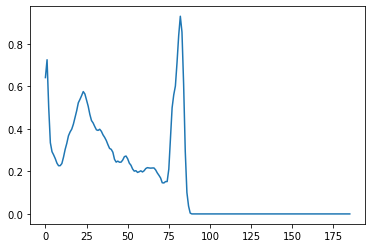

In [295]:
plt.plot(first_layer_activation[0][:,1])

Example for how the activation looks for a single filter in the first layer activation

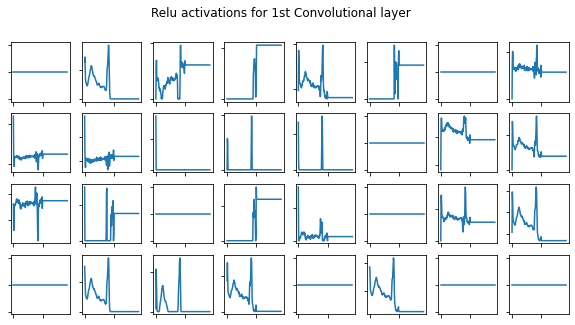

In [333]:
figure, axes = plt.subplots(nrows=4, ncols=8)
counter = -1
for i in range(0,4):
    for j in range(0,8):
        counter += 1
        axes[i,j].plot(first_layer_activation[0][:,counter])
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
figure.suptitle("Relu activations for 1st Convolutional layer")       
figure.set_size_inches(10, 5)
            

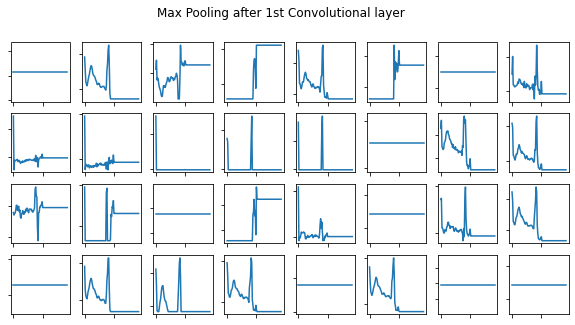

In [332]:
figure, axes = plt.subplots(nrows=4, ncols=8)
counter = -1
for i in range(0,4):
    for j in range(0,8):
        counter += 1
        axes[i,j].plot(second_layer_activation[0][:,counter])
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
figure.suptitle("Max Pooling after 1st Convolutional layer")       
figure.set_size_inches(10, 5)
            

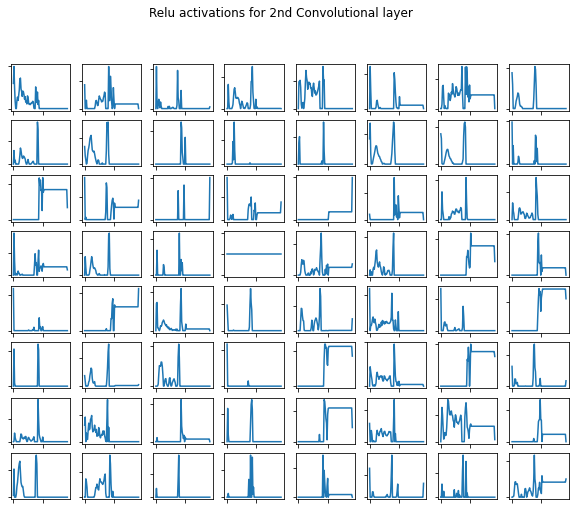

In [331]:
figure, axes = plt.subplots(nrows=8, ncols=8)
counter = -1
for i in range(0,8):
    for j in range(0,8):
        counter += 1
        axes[i,j].plot(third_layer_activation[0][:,counter])
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
figure.suptitle("Relu activations for 2nd Convolutional layer")
figure.set_size_inches(10, 8)


## Conclusions:

- Convolutional neural networks for 1 dimensional data yeild good results in terms of accuracy and precision.
- Convolutional neural networks tend to have an inverse triangle structure on which they perform better, extracting general features in their first layers, and then combining these to correclty classify the data.
- The visualization of what are the activations of the CNNs shows some patterns that resemble usual EKGs, with peaks of voltage at single points (Corresponding to the QRS complex).